<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_01_IEEE_Deteccion_Fraude/blob/Herdiz-Z%C3%BA%C3%B1iga/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 5.5 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import csv
#from skimpy import skim
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
from sklearn.model_selection import GridSearchCV

import matplotlib as mpl
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
import pydotplus
import graphviz

from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
os.chdir('C:\\Users\\erick\\documents\\proyectofin\\')
dir_base='C:\\Users\\erick\\documents\\proyectofin\\'

In [ ]:
os.chdir('/content/drive/MyDrive/cc_fraude/dataset')
dir_base='/content/drive/MyDrive/cc_fraude/dataset/'

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df=pd.read_csv('train.csv', delimiter=";")

<ipython-input-11-97074b91508e>:1: DtypeWarning: Columns (202) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv', delimiter=";")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 207 entries, TransactionID to card5
dtypes: float64(29), int64(159), object(19)
memory usage: 932.6+ MB


In [ ]:
df.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V109,V115,V116,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,P_emaildomain,addr1,addr2,card1,card2,card3,card5
0,2987000,0,86400,68.50,W,discover,credit,19,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,97,13,26,10,13,13,0,T,T,T,M2,F,T,F,F,T,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,gmail.com,otros,87,otros,321,150,otros
1,2987001,0,86401,29.00,W,mastercard,credit,8,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,97,8,0,10,0,43,0,T,T,T,M0,T,T,F,F,T,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,gmail.com,325,87,otros,otros,150,otros
2,2987002,0,86469,59.00,W,visa,debit,287,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,97,8,0,10,0,315,315,T,T,T,M0,F,F,F,F,F,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,otros,otros,87,otros,490,150,166
3,2987003,0,86499,50.00,W,mastercard,debit,8,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112,0,94,0,84,43,111,T,T,T,M0,T,F,F,F,T,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,48,28,0,10,4,1,38,24,0,0,0,1,1,1,1,1,1,50.00,1758.00,925.00,0.00,354.00,135.00,50.00,1404.00,790.00,0.00,0.00,0.00,1,28,0,0,0,0,10,0,4,0,0,1,1,1,1,38,24,0,0,0,0,0,0,0,0,0,50.00,1758.00,925.00,0.00,354.00,0.00,135.00,0.00,0.00,0.00,50.00,1404.00,790.00,0.00,0.00,0.00,yahoo.com,otros,87,otros,otros,150,otros
4,2987004,0,86506,50.00,H,mastercard,credit,8,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,97,8,26,10,15,43,52,T,T,T,M0,F,F,F,F,T,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,gmail.com,otros,87,otros,otros,150,otros
5,2987005,0,86510,49.00,W,visa,debit,36,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,97,8,0,10,0,0,0,T,T,T,M1,F,T,F,F,T,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0

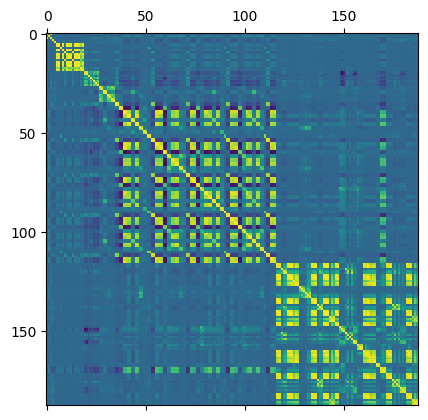

In [ ]:
correlacion = df.corr(numeric_only=True)

In [ ]:
z = linkage(correlacion, 'complete')
fig = plt.figure(figsize=(40, 15))
dn = dendrogram(z)
plt.show()

In [ ]:
print(z)

In [ ]:
correlacion.to_csv('dfcorr.csv')

NameError: ignored

In [ ]:
with open('colsNum2.csv', 'r') as f:
  cols = csv.reader(f)
  head = next(f)
head=head.replace("\ufeff","")
head=head.replace("\n","")
head=head.replace('"',"")
head=head.replace(";",",")
head=head.replace("','",",")
head=head.replace("isFraud,","")
cols_int=head.split(",")

In [ ]:
cols_int

In [ ]:
skim(df[0:100])

In [ ]:
cols_cat_trns= ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'P_emaildomain', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
""", 'addr2', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']"""
cols_int_trns= ['TransactionAmt']

In [ ]:
pruebaCols = df[cols_cat_trns+cols_int+['isFraud']]
pruebaCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 158 entries, ProductCD to isFraud
dtypes: float64(21), int64(124), object(13)
memory usage: 711.9+ MB


In [ ]:
pruebaCols.head(20)

,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,addr1,addr2,M1,M2,M3,M4,M5,M6,M7,M8,M9,TransactionID,TransactionDT,TransactionAmt,dist1,C2,C3,C5,C9,C13,D1,D2,D3,D4,D5,D10,D11,D15,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V23,V24,V25,V26,V27,V28,V29,V30,V31,V35,V36,V37,V38,V39,V40,V43,V44,V45,V46,V47,V48,V49,V50,V53,V54,V55,V56,V57,V59,V60,V61,V62,V63,V66,V67,V68,V69,V71,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V86,V87,V89,V90,V94,V95,V96,V97,V98,V99,V100,V102,V104,V105,V109,V115,V116,V123,V124,V125,V128,V129,V130,V131,V134,V135,V136,V137,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V295,V297,V300,V301,V302,V303,V304,V308,V309,V310,V311,V312,V313,V314,V315,V318,V319,V320,V321,isFraud
0,W,otros,321,150,discover,otros,credit,gmail.com,otros,87,T,T,T,M2,F,T,F,F,T,2987000,86400,68.50,19,1,0,0,1,1,14,97,13,26,10,13,13,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,W,otros,otros,150,mastercard,otros,credit,gmail.com,325,87,T,T,T,M0,T,T,F,F,T,2987001,86401,29.00,8,1,0,0,0,1,0,97,8,0,10,0,43,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
2,W,otros,490,150,visa,166,debit,otros,otros,87,T,T,T,M0,F,F,F,F,F,2987002,86469,59.00,287,1,0,0,1,1,0,97,8,0,10,0,315,315,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,W,otros,otros,150,mastercard,otros,debit,yahoo.com,otros,87,T,T,T,M0,T,F,F,F,T,2987003,86499,50.00,8,5,0,0,1,25,112,112,0,94,0,84,43,111,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,48,28,0,10,4,38,0,0,1,1,1,1,1,1,925.00,0.00,354.00,135.00,790.00,0.00,0.00,0.00,28,0,0,0,0,10,0,4,0,0,1,1,1,24,0,0,0,0,0,0,925.00,0.00,354.00,0.00,135.00,0.00,0.00,0.00,790.00,0.00,0.00,0.00,0
4,H,otros,otros,150,mastercard,otros,credit,gmail.com,otros,87,T,T,T,M0,F,F,F,F,T,2987004,86506,50.00,8,1,0,0,0,1,0,97,8,26,10,15,43,52,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
5,W,otros,555,150,visa,226,debit,gmail.com,otros,87,T,T,T,M1,F,T,F,F,T,2987005,86510,49.00,36,1,0,0,1,1,0,97,8,0,10,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
6,W,otros,otros,150,visa,166,debit,yahoo.com,otros,87,T,T,T,M0,F,F,T,T,T,2987006,86522,159.00,0,1,0,0,1,1,0,97,8,0,10,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
7,W,otros,490,150,visa,226,debit,otros,325,87,T,T,T,M0,F,F,F,F,T,2987007,86529,422.50,8,1,0,0,0,1,0,97,8,0

In [ ]:
for column in pruebaCols.columns:
    if column in cols_cat_trns:
        pruebaCols[column] = pruebaCols[column].astype('object')
    """elif column in cols_int_trns:
        pruebaCols[column] = pd.to_numeric(
                      pruebaCols[column], errors='coerce', downcast = 'integer')
    else:
        pruebaCols[column] = pd.to_numeric(
                      pruebaCols[column], errors='coerce')

"""

<ipython-input-45-1f90964b4615>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruebaCols[column] = pruebaCols[column].astype('object')


In [ ]:
X_train, X_test, y_train, y_test= model_selection.train_test_split(
    pruebaCols.drop('isFraud', axis = 'columns'),
    pruebaCols['isFraud'],
    test_size=0.25, random_state=672,
    stratify= pruebaCols['isFraud'])

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 442905 entries, 356548 to 504382
Series name: isFraud
Non-Null Count   Dtype
--------------   -----
442905 non-null  int64
dtypes: int64(1)
memory usage: 6.8 MB


In [ ]:
X_test.head(10)


,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,addr1,addr2,M1,M2,M3,M4,M5,M6,M7,M8,M9,TransactionID,TransactionDT,TransactionAmt,dist1,C2,C3,C5,C9,C13,D1,D2,D3,D4,D5,D10,D11,D15,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V23,V24,V25,V26,V27,V28,V29,V30,V31,V35,V36,V37,V38,V39,V40,V43,V44,V45,V46,V47,V48,V49,V50,V53,V54,V55,V56,V57,V59,V60,V61,V62,V63,V66,V67,V68,V69,V71,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V86,V87,V89,V90,V94,V95,V96,V97,V98,V99,V100,V102,V104,V105,V109,V115,V116,V123,V124,V125,V128,V129,V130,V131,V134,V135,V136,V137,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V295,V297,V300,V301,V302,V303,V304,V308,V309,V310,V311,V312,V313,V314,V315,V318,V319,V320,V321
441769,C,otros,otros,185,mastercard,224,debit,hotmail.com,299,87,T,T,T,M2,F,F,F,F,T,3428769,11219998,13.53,8,9,0,0,0,4,119,119,0,119,0,15,43,20,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,0,1,0,0,2,2,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0,1,0,0,0,0,2,4,2,0,1,0,0,0,0,0,13.53,0.00,6.65,0.00,0.00,0.00,0.00,0.00,0.00,13.53,20.17,13.53
381313,W,otros,otros,150,visa,226,debit,gmail.com,otros,87,T,T,T,M0,F,F,F,F,T,3368313,9556304,102.95,0,2,0,1,2,10,79,79,9,26,10,79,79,79,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,2,0,0,2,0,0,0,0,1,1,1,1,1,1,0.00,0.00,93.90,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0.00,0.00,93.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.95,0.00
564151,W,otros,otros,150,visa,226,debit,otros,otros,87,T,T,T,M0,F,F,F,F,T,3551151,14942418,35.95,8,4,0,2,3,3,0,97,8,0,10,0,79,79,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
48700,W,otros,111,150,mastercard,224,debit,gmail.com,otros,87,T,T,T,M0,F,F,F,F,T,3035700,1170470,25.95,8,4,0,1,4,10,38,38,23,26,10,99,43,99,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0.00,0.00,20.00,0.00,0.00,25.95,45.95,25.95,0.00,0.00,0.00,0.00
90127,W,otros,321,150,visa,226,debit,otros,299,87,T,T,F,M0,F,F,F,F,T,3077127,1885179,209.95,4,109,0,177,95,583,414,414,58,437,58,155,0,437,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
244313,W,otros,321,150,visa,226,debit,gmail.com,otros,87,T,T,T,M0,F,F,F,T,T,3231313,5795324,82.95,7,2,0,1,1,12,224,224,14,26,10,25,224,224,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0.00,0.00,190.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489134,W,otros,321,150,visa,226,debit,gmail.com,otros,87,T,F,F,M0,F,F,F,F,T,3476134,12759060,107.95,8,4,0,2,3,9,0,97,8,418,73,0,0,331,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
399874,W,otros,otros,150,visa,226,debit,anonymous.com,204,87,T,T,F,M0,F,T,F,F,T,3386

In [ ]:
prep = ColumnTransformer([('encoder', OneHotEncoder(), cols_cat_trns),
                   ('scaler', StandardScaler(),cols_int),],
                  remainder= 'drop')

In [ ]:
prep

ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                 ['ProductCD', 'card1', 'card2', 'card3',
                                  'card4', 'card5', 'card6', 'P_emaildomain',
                                  'addr1', 'M4', 'M5', 'M6', 'M7']),
                                ('scaler', StandardScaler(),
                                 ['TransactionID', 'TransactionDT',
                                  'TransactionAmt', 'dist1', 'C2', 'C3', 'C5',
                                  'C9', 'C13', 'D1', 'D2', 'D3', 'D4', 'D5',
                                  'D10', 'D11', 'D15', 'V2', 'V3', 'V4', 'V5',
                                  'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                                  'V13', 'V15', ...])])

In [ ]:
arbol_pipe = Pipeline([('preproc', prep),
                       ('arbol', tree.DecisionTreeClassifier(criterion= 'gini',
                                                             class_weight= 'balanced', random_state=672))])


In [ ]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=672)

In [ ]:
arbol_grid = dict(
  arbol__min_samples_split = [500, 900],
  arbol__ccp_alpha = [0.01, 0.001, 0.0001] )

In [ ]:
arbol_tuned = GridSearchCV(arbol_pipe, arbol_grid, cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
arbol_tuned.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=672),
             error_score='raise',
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['ProductCD',
                                                                          'card1',
                                                                          'card2',
                                                                          'card3',
                                                                          'card4',
                                                                          'card5',
                                                                          'card6',
                                                                          'P_emaildomain',
                                                                          'addr1',
                                                                          'M4',
                                                                          'M5',
                                                                          'M6',
                                                                          'M7']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['TransactionID',
                                                                          'T...,
                                                                          'TransactionAmt',
                                                                          'dist1',
                                                                          'C2',
                                                                          'C3',
                                                                          'C5',
                                                                          'C9',
                                                                          'C13',
                                                                          'D1',
                                                                          'D2',
                                                                          'D3',
                                                                          'D4',
                                                                          'D5',
                                                                          'D10',
                                                                          'D11',
                                                                          'D15',
                                                                          'V2',
                                                                          'V3',
                                                                          'V4',
                                                                          'V5',
                                                                          'V6',
                                                                          'V7',
                                                                          'V8',
                                                                          'V9',
                                                                          'V10',
                                                                          'V11',
                                                                          'V12',
                                                                          'V13',
                                               

In [ ]:
arbol_tuned.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['ProductCD', 'card1',
                                                   'card2', 'card3', 'card4',
                                                   'card5', 'card6',
                                                   'P_emaildomain', 'addr1']),
                                                 ('scaler', StandardScaler(),
                                                  ['TransactionID',
                                                   'TransactionDT',
                                                   'TransactionAmt', 'dist1',
                                                   'C2', 'C3', 'C5', 'C9',
                                                   'C13', 'D1', 'D2', 'D3',
                                                   'D4', 'D5', 'D10', 'D11',
                                                   'D15', 'V2', 'V3', 'V4',
                                                   'V5', 'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V15', ...])])),
                ('arbol',
                 DecisionTreeClassifier(ccp_alpha=0.0001,
                                        class_weight='balanced',
                                        min_samples_split=500,
                                        random_state=672))])

In [ ]:
metrics.accuracy_score(y_train, arbol_tuned.predict(X_train))

0.8496449577223106

In [ ]:
print( classification_report(y_train, arbol_tuned.predict(X_train)) )

              precision    recall  f1-score   support

           0       0.99      0.85      0.92    427408
           1       0.17      0.82      0.28     15497

    accuracy                           0.85    442905
   macro avg       0.58      0.84      0.60    442905
weighted avg       0.96      0.85      0.89    442905



In [ ]:
print( classification_report(y_test, arbol_tuned.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.99      0.85      0.91    142469
           1       0.16      0.78      0.26      5166

    accuracy                           0.85    147635
   macro avg       0.57      0.82      0.59    147635
weighted avg       0.96      0.85      0.89    147635



In [ ]:
arbol_tuned.best_estimator_.__class__

sklearn.pipeline.Pipeline

In [ ]:
arbol_tuned.best_estimator_.named_steps['arbol'].__class__

sklearn.tree._classes.DecisionTreeClassifier

[Text(0.7146312572337963, 0.9772727272727273, 'x[109] <= 0.324\ngini = 0.5\nsamples = 442905\nvalue = [221452.5, 221452.5]'),
 Text(0.47312825520833335, 0.9318181818181818, 'x[41] <= -0.076\ngini = 0.485\nsamples = 297210\nvalue = [146493.216, 206848.096]'),
 Text(0.21259910300925927, 0.8863636363636364, 'x[45] <= -0.248\ngini = 0.5\nsamples = 255040\nvalue = [127597.568, 125380.669]'),
 Text(0.03518518518518519, 0.8409090909090909, 'x[12] <= 0.5\ngini = 0.32\nsamples = 22461\nvalue = [10164.656, 40626.538]'),
 Text(0.011851851851851851, 0.7954545454545454, 'x[90] <= 0.661\ngini = 0.161\nsamples = 4917\nvalue = [1854.384, 19120.052]'),
 Text(0.008888888888888889, 0.75, 'x[48] <= -0.396\ngini = 0.225\nsamples = 3944\nvalue = [1642.469, 11060.478]'),
 Text(0.005925925925925926, 0.7045454545454546, 'x[178] <= -0.017\ngini = 0.425\nsamples = 832\nvalue = [398.441, 900.272]'),
 Text(0.002962962962962963, 0.6590909090909091, 'gini = 0.344\nsamples = 459\nvalue = [210.879, 743.081]'),
 Text(0

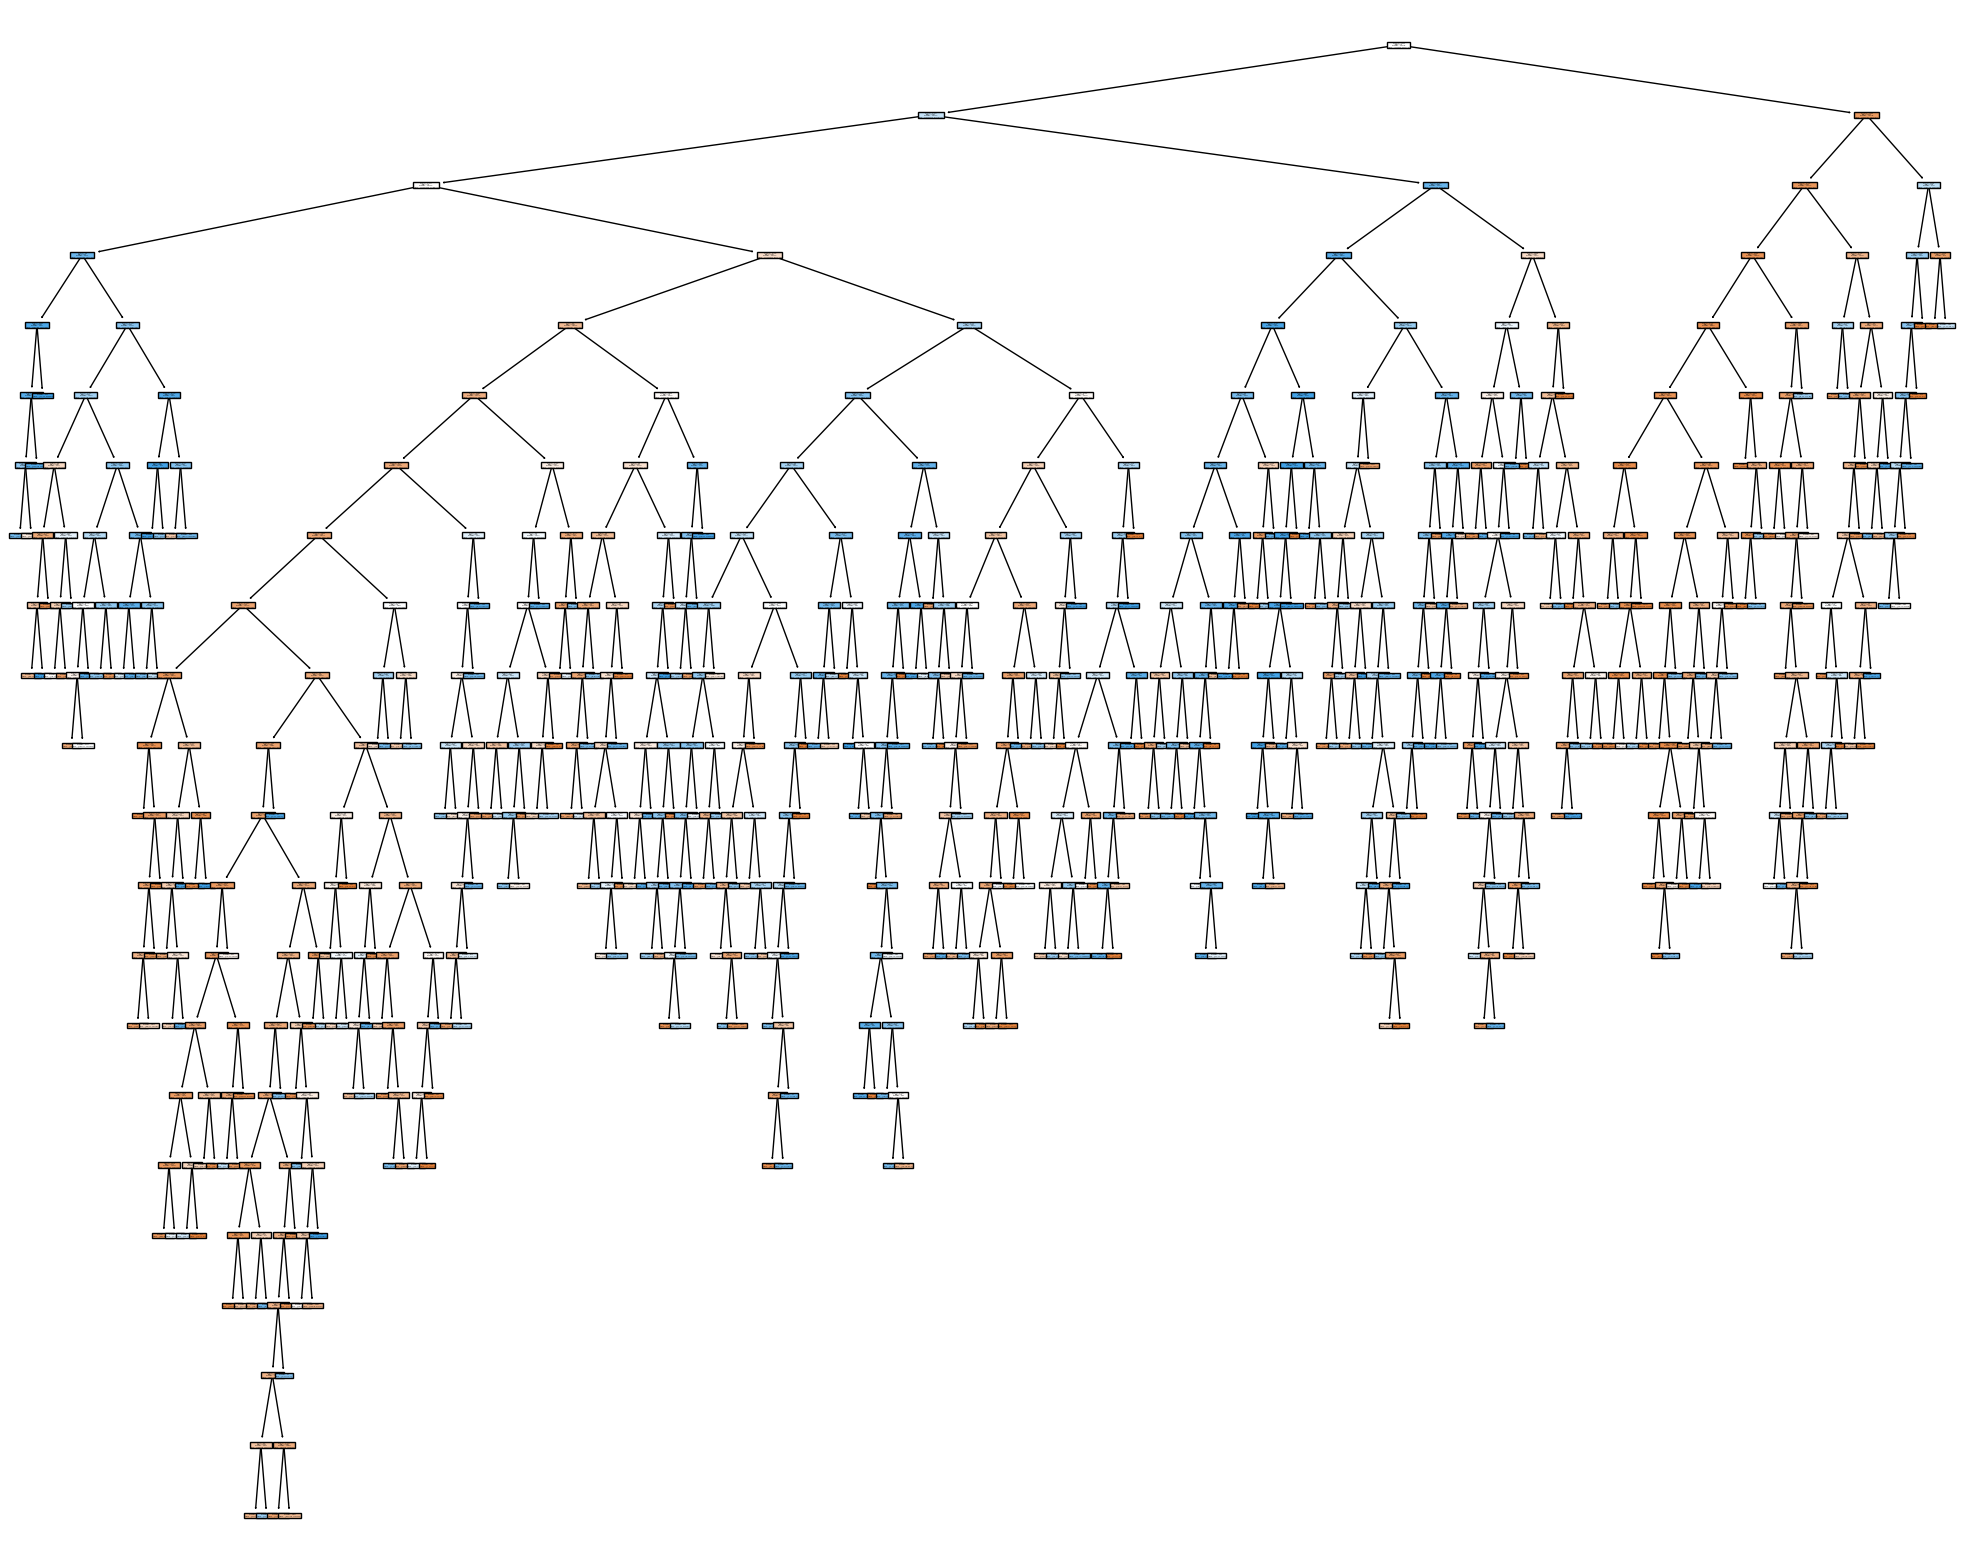

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree( arbol_tuned.best_estimator_.named_steps['arbol'], filled= True)

In [ ]:
arbol_pipe.named_steps['preproc'].fit_transform(X_train)
arbol_pipe.named_steps['preproc'].named_transformers_['encoder'].get_feature_names_out(cols_cat_trns)
labels= np.concatenate( [ prep.named_transformers_['encoder'].get_feature_names_out(cols_cat_trns), cols_int_trns])
labels

array(['ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S',
       'ProductCD_W', 'card1_7919', 'card1_otros', 'card2_111',
       'card2_321', 'card2_490', 'card2_555', 'card2_otros', 'card3_150',
       'card3_185', 'card3_otros', 'card4_american express',
       'card4_discover', 'card4_mastercard', 'card4_visa', 'card5_166',
       'card5_224', 'card5_226', 'card5_otros', 'card6_charge card',
       'card6_credit', 'card6_debit', 'card6_debit or credit',
       'P_emaildomain_anonymous.com', 'P_emaildomain_gmail.com',
       'P_emaildomain_hotmail.com', 'P_emaildomain_otros',
       'P_emaildomain_yahoo.com', 'addr1_204', 'addr1_264', 'addr1_299',
       'addr1_325', 'addr1_otros', 'TransactionAmt'], dtype=object)

In [ ]:
# DOT data
dot_data = tree.export_graphviz(arbol_tuned.best_estimator_.named_steps['arbol'],
                                feature_names= labels,
                                filled= True)
# graph
graph = graphviz.Source(dot_data, format="png")
graph.render().replace('\\', '/')

ValueError: ignored